In [83]:
import os
train_data = os.listdir('train/')
print(train_data[0])

dog.8011.jpg


In [84]:
labels=[]

for s0mething in train_data:
    if 'cat' in s0mething:
        labels.append(0)
    if 'dog' in s0mething:
        labels.append(1)



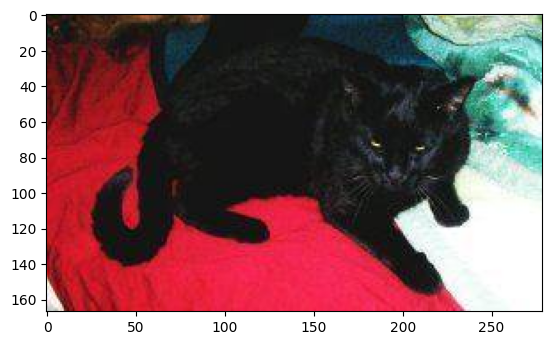

In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as img

cat_image = img.imread("train/cat.11531.jpg")
plt.imshow(cat_image)